# The Impact of a Song's Musical Characteristics on its Popularity

## The Dataset Report

06/06/2021

Written by Chris Vajdík (s1018903) for the course Frequentist Statistics. 

*Note: This project was initially developed in cooperation with Arne Wittgen, s1034858, and is being reworked this year by Chris Vajdík, s1018903, as discussed with Linda Geerligs on 6 April 2021. Therefore, you can find an additional section **VIII. Changes** which details all difference of the 2021 version versus the 2020 version.* 

## I. Abstract

This project aims to identify which musical characteristics of a song composed by a specific artist influence the song's popularity and which combination of characteristics should a new song composed by this artist possess in order to be as popular as possible among their listeners. Furthermore, this project lays the necessary methodological groundwork for performing similar analyses.

## II. Introduction

The main aim of this project is to **discover which musical characteristics of songs composed by a specific artist influence the song’s popularity**. Lyrical characteristics are not considered. The secondary goal is to **specify which combination of characteristics should a new song from this artist have to be as popular as possible among their listeners**. Both normalised and absolute values of songs popularity will be considered in this project. The intuition suggests that using normalised values could eliminate the influence of general musical trends on the popularity of songs performed by the particular artist, thus allowing the focus of the models to be entirely on the musical style the particular artist has. While it is not possible to validate the focus of the model, it is possible to compare the performance of models using absolute and normalised popularity values, and it can be hypothesised that a narrowly focused model has a better performance than a widely focused model.

The general hypothesis of this project is that **there exist at least two musical characteristics that correlate strongly with the song’s popularity and whose relation to the popularity is linear in nature**. For every characteristic obtained, it will be answered whether it correlates with popularity and if so, how strong is the correlation and of which type it is. Using knowledge obtained with this method, the forward- and backward-selection method will be obtained on the data set for variables whose effect can reasonably be linear in nature. This method will provide the answer to what characteristics should a future song have to be as popular as possible.

The choice of an artist was a major concern when deciding about the topic of this report. The chosen artist must produce **musically varied songs in every studio album**, so that the most popular songs by them would not just be the average of all their songs. Additionally, the artist must have released at least 30 unique songs, so there would be enough data to perform an analysis. In This Moment meets both criteria and so was chosen for this project.

### II.I The Research Questions

The main research question this project aims to answer is: **Which musical characteristics of songs composed by In This Moment statistically significantly influence the song’s popularity?**

Two sub-questions arise due to the setup of this project:
- Which combinations of musical characteristics are recommended for a new song to contain to maximise its popularity amongst the listeners of In This Moment?
- Is there any evidence that models based on the relative popularity of In This Moment songs predict the popularity of their song significantly better than models based on the absolute popularity?

### II.II The Hypotheses

The hypotheses of this project are defined as follows:

- **H1.1: The best model that uses normalised popularity performs significantly better than the best model that uses absolute popularity.** For the purposes of this project, we define ’the best model’ as either the better performing of the pair of models obtained by forward- and backward-selection methods or, if both methods converge into a single model, the model obtained by them. Furthermore, we define ’significantly better’ as at having at least 5% lower MAPE than the other model (MAPE is mean absolute percentage error; $MAPE = \frac{1}{n} \sum{t=1}{n} |\frac{A_t - F_t}{A_t}|$ where $n$ is the number of observations, $A$ is the actual value and $F$ is the forecasted value).
  - **H1.0.1:** The best model that uses normalised popularity performs just as well as the best model that uses absolute popularity.
  - **H1.0.2:** The best model that uses absolute popularity performs significantly better than the best model that uses normalised popularity.
- **H2: Every response variable has a statistically significant, linearly characterised effect on the popularity score.** Where statistically significant refers to the p-value being at most 0.05.
  - **H2.1.1: The duration** has a statistically significant, linearly characterised effect on the popularity score.
    -   **H2.1.0:** The duration does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.2.1: The explicitness** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.2.0:** The explicitness does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.3.1: The key** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.3.0:** The key does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.4.1: The mode** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.4.0:** The mode does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.5.1: The time** signature has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.5.0:** The time signature does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.6.1: The valence** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.6.0:** The valence does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.7.1: The tempo** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.7.0:** The tempo does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.8.1: The acousticness** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.8.0:** The acousticness does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.9.1: The danceability** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.9.0:** The danceability does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.10.1: The energy** has a statistically significant,
        linearly characterised effect on the popularity score.
    - **H2.10.0:** The energy does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.11.1: The instrumentalness** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.11.0:** The instrumentalness does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.12.1: The loudness** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.12.0:** The loudness does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.13.1: The speechiness** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.13.0:** The speechiness does not have a statistically significant, linearly characterised effect on the popularity score.
  - **H2.14.1: The complexity** has a statistically significant, linearly characterised effect on the popularity score.
    - **H2.14.0: The complexity** does not have a statistically significant, linearly characterised effect on the popularity score.

## III. The Data Set

**Spotify Developer API** ( <https://developer.spotify.com/> ) and **Spotipy library** ( <https://spotipy.readthedocs.io/en/2.12.0/> ) was used to obtain the musical data on every studio song recorded by In This Moment. Every data record represents a single song and contains following variables: the popularity as calculated by Spotify’s popularity algorithm, their name and spotify id, track number, duration, whether or not are they explicit, musical attributes (key, mode, time signature, valence and tempo) and their ratings on acousticness, danceability, energy, instrumentalness, loudness and speechiness. All data are provided by Spotify.

The script developed to obtain the data and the data set itself can be viewed and download from the project’s repository
[here](https://github.com/ChrisScarred/ITM-song-popularity/tree/2021). Note that there is a useful report `database/itm_songs_report.html` automatically obtained by using the library [pandas-profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/). You can see the report by downloading the [source](https://github.com/ChrisScarred/ITM-song-popularity/blob/2021/database/itm_songs_report.html) and opening the file via your web browser. This report shows, among other statistics, that the rate of missing values is zero for every variable.

#### III.I The Population

The population consists of **every studio song by In This Moment**, including every album they produced. The only excluded songs were those recorded live and duplicates which occur because of the way Spotify handles different releases of the same albums. The size of this population is 86 songs.

#### III.II The Response Variable

The response variable is **popularity** measured by algorithm by Spotify, ranging from 0 to 100 with 100 being the most popular. This algorithm is based on the number of streams the song has had in total and how many of those are recent. The algorithm uses other measurements as well but these are not publicly known. The popularity obtained is absolute and to make it relative, it will be normalised so that 0 stands for the least popular song by the artist and 100 stands for the most popular song by the artist.

#### III.III The Explanatory Variables

- **the duration** - a quantitative positive integer measure stating the duration of the song in ms.
- **the explicitness** - a categorical variable representing whether the song is explicit: 0 represent it is not explicit, 1 represents it is. Spotify does not enclose how this measurement is calculated.
- **the key** - a categorical variable representing the overall key in the song. Integers map to pitches using standard Pitch Class notation:
  - C’s and notes that are equivalent to C (like B-sharp) are represented by 0.
  - C-sharps’s and notes that are equivalent to C-sharp (like D-flat) are represented by 1.
  - The rest as follows: D = 2, D-sharp = 3, E = 4, F = 5, F-sharp = 6, G = 7, G-sharp = 8, A = 9, B-flat (T) = 10 and B (E) = 11.
- **the mode** - a categorical variable where 0 represents minor mode and 1 represents major mode.
- **the time signature** - a quantitative integer measure ranging from 0 above, describing the estimated overall time signature of the song in the time signature format (meter) that specifies how many beats are in each bar.
- **the valence** - a quantitative float measure ranging from 0.0 to 1.0 describing how musically positive a track feels (the higher the value, the more positive the feel). Spotify does not enclose how this measurement is calculated.
- **the tempo** - a quantitative float measure ranging from 0.0 above, typically having values between 50 and 200, describes how fast a song is in BPM.
- **the acousticness** - a quantitative float measure ranging from 0.0 to 1.0 describing how probable it is that the song is acoustic. Spotify does not enclose how this measurement is calculated.
- **the danceability** - a quantitative float measure ranging from 0.0 to 1.0 describing how suitable the song is for dancing (the higher the value, the more suitable the song is for dancing). The  measurement is based on musical elements including tempo, rhythm stability, beat strength and overall regularity.
- **the energy** - a quantitative float measure ranging from 0.0 to 1.0 describing how energetic the song feels (the higher the value, the more energetic the song). The measurement is based on dynamic range, perceived loudness, timbre, onset rate and general entropy.
- **the instrumentalness** - a quantitative float measure ranging from 0.0 to 1.0 describing the relative amount of instrumental characteristics in the song with values above 0.5 likely being instrumental songs. The measurement is based on the absence of words combines with the presence of non-verbal vocalised utterances like “aaaah” or “oooh” within the song.
- **the loudness** - a quantitative float measure typically ranging from -60 to 0 describing the average loudness of the song in dB.
- **the speechiness** - a quantitative float measure ranging from 0.0 to 1.0 describing how much of a spoken word is probably there in the song with values above 0.66 indicating the track is most likely a podcast or an interview.
- **the complexity** - a quantitative positive integer measure ranging from 0 above describing how complex the song is (the higher the number, the more complex the song). Corresponds to the number of segments, or in other words, continuous similar parts of the song, in the song. We will normalise this value so that it ranges from 0.0 to 1.0 before building the models.

## IV. Methods

### IV.I Prequisities

These prequisities bear no significance to the methods used to obtain the data set but will be used in the later sections and subsections of this report.

In [439]:
"""Imports necessary packages"""

import itertools
import math
from typing import Dict, Iterable, List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

In [440]:
def make_distplot(data: Iterable, xlim_min: Union[int, float, None] = None, xlim_max: Union[int, float, None] = None, xlabel: str = "x", ylabel: str = "y", title: str = "A distplot") -> None:
    """Prints a distplot.

    Args:
        data (Iterable): the one dimensional data used to print the plot.
        xlim_min (Union[int, float, None], optional): if not None, declares the minimal point on the x axis that should be visible. Defaults to None.
        xlim_max (Union[int, float, None], optional): if not None, declares the maximal point on the x axis that should be visible. Defaults to None.
        xlabel (str, optional): the label for the x axis. Defaults to "x".
        ylabel (str, optional): the label for the y axis. Defaults to "y".
        title (str, optional): the title of the plot. Defaults to "A distplot".
    """
    plt.figure()
    sns.distplot(data)
    if not isinstance(xlim_min, type(None)):
        if not isinstance(xlim_max, type(None)):
            plt.xlim(xlim_min, xlim_max)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [441]:
def make_scatterplot(x_data: Iterable, y_data: Iterable, xlabel: str = "x", ylabel: str = "y", title: str = "A scatterplot") -> None:
    """Prints a scatterplot.

    Args:
        x_data (Iterable): the one dimensional data to plot on the x axis.
        y_data (Iterable): the one dimensional data to plot on the y axis.
        xlabel (str, optional): the label for the x axis. Defaults to "x".
        ylabel (str, optional): the label for the y axis. Defaults to "y".
        title (str, optional): the title of the plot. Defaults to "A scatterplot".
    """
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [442]:
def make_boxplot(data: Iterable, title: str = "A boxplot"):
    """Prints a box plot.

    Args:
        data (Iterable): the one dimensional data to plot.
        title (str, optional): the title of the plot. Defaults to "A boxplot".
    """
    plt.figure()
    plt.boxplot(data)
    plt.title(title)
    plt.show()    

In [443]:
def make_qqplot(data: Iterable, title: str = "A Q-Q plot") -> None:
    """Prints a Q-Q plot.

    Args:
        data (Iterable): the one dimensional data to plot.
        title (str, optional): the title of the plot. Defaults to "A Q-Q plot".
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(title)
    plt.show()

In [444]:
def make_qq_dist(data: Iterable, var_name: str, xlim_min: Union[int, float, None] = None, xlim_max: Union[int, float, None] = None) -> None:
    """Makes a figure with a Q-Q plot on the left and a distplot on the right.

    Args:
        data (Iterable): the one dimensional data to plot.
        var_name (str): the name of the variable being plotted.
        xlim_min (Union[int, float, None], optional): if not None, declares the minimal point on the x axis that should be visible. Defaults to None.
        xlim_max (Union[int, float, None], optional): if not None, declares the maximal point on the x axis that should be visible. Defaults to None.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle('The distribution of %s' % var_name)

    stats.probplot(data, dist="norm", plot=ax1)
    ax1.set_title("A Q-Q plot of %s" % var_name)

    sns.distplot(data, ax=ax2)
    if not isinstance(xlim_min, type(None)):
        if not isinstance(xlim_max, type(None)):
            ax2.set_xlim(xlim_min, xlim_max)
    ax2.set_xlabel(var_name)
    ax2.set_ylabel("probability")
    ax2.set_title("A distplot of %s" % var_name)

    plt.show()

In [445]:
def make_catplot(var: str, data: Iterable, title: str = "The distribution", height: Union[int, float] = 6, aspect: Union[int, float] = 1/1) -> None:
    """Prints a bar plot of a categorical variable's values [x axis] and frequencies [y axis].

    Args:
        var (str): the name of the variable to plot.
        data (Iterable): the two dimensional data which includes the variable.
        title (str, optional): the title of the plot. Defaults to "The distribution".
        height (Union[int, float], optional): the height of the figure in inches. Defaults to 6.
        aspect (Union[int, float], optional): the aspect ratio of the figure [width/height]. Defaults to 1/1.
    """
    plt.figure()
    sns.catplot(x=var, kind="count", data=data, height=height, aspect=aspect)
    plt.title(title)
    plt.show()

In [446]:
def make_stripplot(cat_var: str, num_var: str, data: Iterable, title:str="The distribution"):
    """Prints a scatter plot of a categorical variable's values [x axis] against a numerical variable's values [y axis].

    Args:
        cat_var (str): the name of the categorical variable.
        num_var (str): the name of the numerical variable.
        data (Iterable): the two dimensional data which includes the categorical and the numerical variable.
        title (str, optional): the title of the plot. Defaults to "The distribution".
    """
    plt.figure()
    sns.stripplot(x=cat_var, y=num_var, data=data)
    plt.title(title)
    plt.show()

### IV.II Obtaining the data set

\[todo: description of Spotipy and the modules in `src`\]

In [447]:
data = pd.read_csv("D:/School/frequentist-statistics/ITM-song-popularity/database/itm_songs_preprocessed.csv")
data = data.drop("Unnamed: 0", axis=1)
print("%i songs with following attributes loaded: %s." % (len(data), ", ".join(list(data.columns.values))))

86 songs with following attributes loaded: name, name_len, track_number, duration, key, mode, time_signature, acousticness, danceability, energy, instrumentalness, loudness, speechiness, valence, tempo, explicit, complexity, popularity_abs, popularity_norm, age_days.


### IV.III Checking the CLT assumptions

To apply the basic methods of frequentist statistics, the CLT (Central Limit Theorem) assumptions must hold. Those are:

**- Independence:** the independence of a sample is typically assured by random division into the control and treatment groups, if those are used in the experiment, and by either sampling with replacement from the population or sampling without replacement but sampling less than 10% of the population. The reasoning for this is that for every additional observation sampled without replacement, the probability of sampling it becomes $\frac{1}{n-1}$ where $n$ stands for the remaining size of the population that can be sampled before the previous observation was sampled. This means that every sample obtained without replacement is dependent, however if its size is smaller than 10% of the population, this dependency is of negligible extend. Given the size of our entire population is $n=86$, to sample less than 10% of the population, it would be required to only sample 8 or less observations. This is too little to guarantee nearly-normal distributions of point estimates, therefore it was chosen to employ the notion of total population sampling - obtaining every observation of the population of interest. To ensure this sample is not dependent or biased, it is needed to establish a concrete definition of our population: studio-album songs composed by In This Moment. The 'studio-album' criterion excludes live recordings and single releases; this is to ensure no duplicate songs are present in the population. The 'song' criterion excludes interviews or podcasts; this ensures it is logical to analyse the musical characteristics. It is also required to ensure the population is indeed complete, which was assured by comparing the samples with the statistics at [last.fm page for In This Moment](https://www.last.fm/music/In+This+Moment) (last.fm is a musical statistics company).  

**- The success-failure condition:** it is required that the sample size is *sufficiently* large. This typically means there are at least 30 observations in the sample, which holds for the sample used in this report. If the population is binomial, there need to be at least 10 observations of 'successes' and at least 10 observations of 'failures'. The population in this report is not binomial, so this condition is irrelevant. 

Furthermore, we can visually inspect the distribution of the response variable to ensure the population is indeed of a nearly-normal distribution.

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


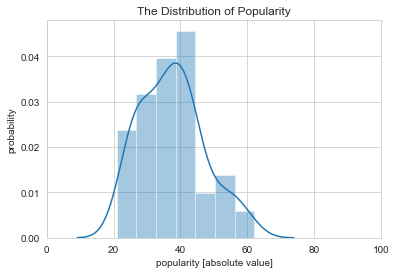

In [448]:
make_distplot(data["popularity_abs"], xlim_min = 0, xlim_max = 100, xlabel="popularity [absolute value]", ylabel="probability", title="The Distribution of Popularity")

It can be seen from the plot that the popularity distribution is unimodal, roughly symmetrical with a notable right skew. This is to be expected, as typically, there is a handful of songs from an artist that are significantly more popular than others; for example because they were released as singles, they are often played life, they have a video clip released or simply because listeners like them. The distribution has a bell shape, although it is quite narrow and rather bumpy, as a result of the right tail. Note that the x axis was set from 0 to 100 to accuratelly visually represent the standard deviation of the distribution in the relationship with the possible value range.

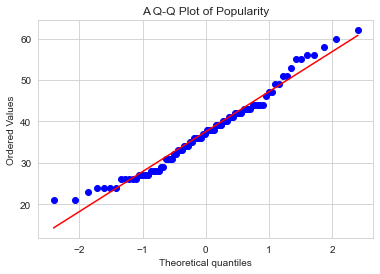

In [449]:
make_qqplot(data["popularity_abs"], title="A Q-Q Plot of Popularity")

The Q-Q plot further supports the claim that the popularity distribution is nearly normal. It however drives our attention to the lower values of the distribution which are more frequent than it would be in the normal distribution. There is no reason to suspect this occurred un-naturally, as it is common that there are several less well-known songs which are by extension less popular. Those are typically at the end of albums, not often played live or available only on certain markets (commonly the Japanese market has an exclusive song for every album as an incentive to get more sales since the market is generally expensive compared to the rest of the world).

The boxplot of popularity was examined as well but did not provide any additional insides.

### IV.IV Missing data

Typically, the missing data is handled before examining the data set, however this data set does not contain any missing data, as evidenced below.

In [450]:
print("The number of missing values per variable:")
data.isnull().sum()

The number of missing values per variable:


name                0
name_len            0
track_number        0
duration            0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
loudness            0
speechiness         0
valence             0
tempo               0
explicit            0
complexity          0
popularity_abs      0
popularity_norm     0
age_days            0
dtype: int64

### IV.V Examining the data set

It is advised to examine the properties of explanatory variables before any analyses are performed. This is to ensure that we do not have unreasonable assumptions and we have a good idea about the properties of our data set, including outliers. 

#### IV.V.I Outlier Detection

The first step of the visual inspection is using boxplots to analyse outliers in numerical explanatory variables. Following six boxplots showed some interesting properties while the rest of variables had generic boxplots (as can be seen in the Appendix IX.I).

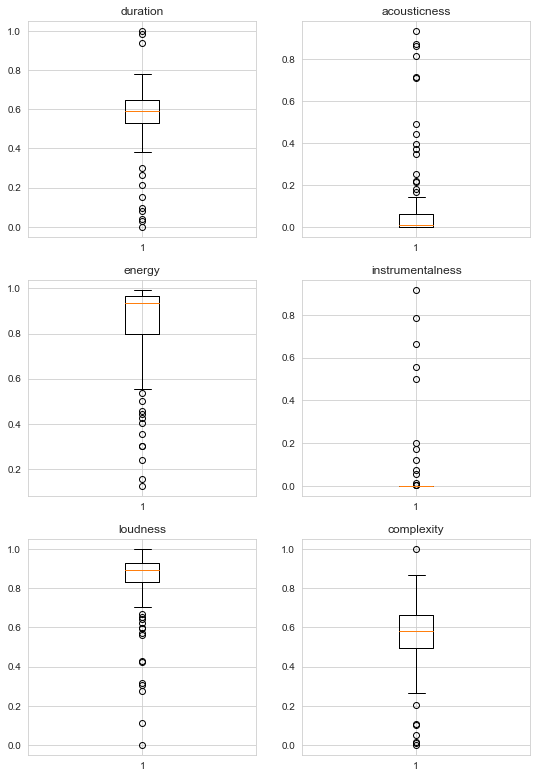

In [451]:
variables_of_interest = ["duration", "acousticness", "energy", "instrumentalness", "loudness", "complexity"]
fig, axs = plt.subplots(3, 2, figsize=(9, 13.5))

for i, var in enumerate(variables_of_interest):
    axs[math.floor(i/2), i % 2].boxplot(data[var])
    axs[math.floor(i/2), i % 2].set_title(var)
    
plt.show()

From the above plots, it can be inferred that:

- Most of the songs of In This Moment are slighly longer than their average length, as the median of the relative length is almost 0.6. There is a handful of very short songs, which lower the average and there are three unusually long songs. This distribution is not surprising, as most artists have several relatively short songs, typically those used as singles, and a few longer ones, which are perhaps experimental.
- Approximatelly a half of the songs by In This Moment has acousticness of zero while there are several more acoustic outliers. Based on auditory examination, there is no reason to suspect these outliers are unnatural.
- Around a half of the songs of In This Moment is relatively highly energetic with a handful of less energetic songs lowering the average. Based on auditory examination, there is no reason to suspect these outliers are unnatural.
- A vast majority of observations has a low level of instrumentalness, suggesting there is little reason to include this variable in modelling, as there is not enough data to prove its effect.
- Most of the songs of In This Moment are relatively loud with a few relatively silent observations. The spread of the interval of $<-1.5*IQR, 1.5IQR>$ however is at least 30% percent of all observations which suggests this variable might still have a significant effect.
- Most of the songs of In This Moment are slighly more complex than their average complexity, as the median of the relative complexity is almost 0.6. There is a handful of not complex songs, which lower the average and there is one unusually comples song. This distribution is not surprising, as most artists have several relatively less complex songs, typically those used to catch people's attention while playing on radios, and a few more complex ones, which are perhaps experimental.

#### IV.V.II Inspection of the categorical variables

Categorical variables should be inspected to see whether the occurrence of categories is not heavily imbalanced. While this is not always a problem, if the less frequent categories contain less than 10 observations, the use of that variable is discouraged due to an increased potential for influencial points occurring by change rather than because of an real effect.

<Figure size 432x288 with 0 Axes>

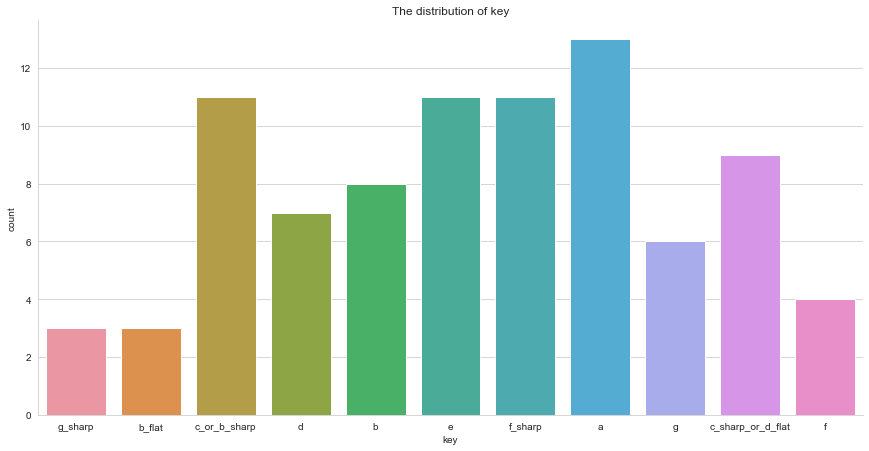

In [452]:
make_catplot("key", data=data, title="The distribution of key", aspect=2/1)

It is visible in the figure above that only 4 out of 11 values for the key have more than 10 observations. The variable key is therefore discarded from using in modelling as there is not enough data to prove its effect on the popularity.

<Figure size 432x288 with 0 Axes>

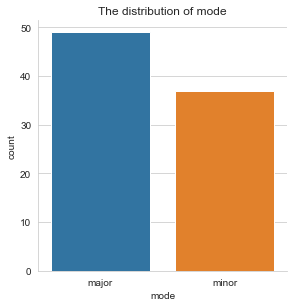

In [453]:
make_catplot("mode", data=data, title="The distribution of mode", height=4)

While there are more observations of the major mode, there are still many observations of the minor mode as well, meaning the variable mode can be used in the modelling.

<Figure size 432x288 with 0 Axes>

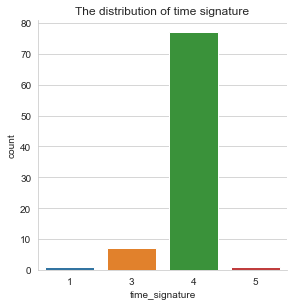

In [454]:
make_catplot("time_signature", data=data, title="The distribution of time signature", height=4)

Since only the value 4 of the variable time signature has more observations than 10 and the classes are highly imbalanced, the variable time is  discarded from using in modelling.

<Figure size 432x288 with 0 Axes>

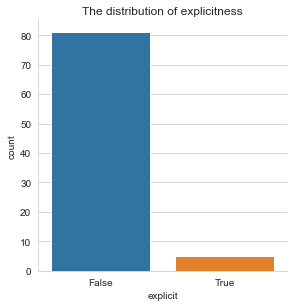

In [455]:
make_catplot("explicit", data=data, title="The distribution of explicitness", height=4)

Since the vast majority of observations fall under the false class for the variable explicit and there are only 5 observations in the true class for this variable, it is discarded from the use in modelling./

#### IV.V.III Examining correlations

There is a good chance that a data set with multiple explanatory variables will contain some correlations. This can be examined plotting every combination of numerical explanatory variables against each other and plotting every categorical explanatory variable against every numerical explanatory variable.

Relatively many moderately strong correlations were found between numerical explanatory variables, which can be seen in the Appendix IX.II. Based on visual examination, following relationships were identified:

- a positive correlation of the track number and complexity
- a positive correlation of the track number and duration
- a positive correlation of duration and loudness
- a negative correlation of duration and speechiness 
- a negative correlation of acousticness and loudness
- a positive correlation of danceability and valence
- a positive correlation of danceability and complexity
- a positive correlation of loudness and complexity 
- a positive correlation of valence and complexity

One especially strong correlation and two relatively strong correlations were also found between the numerical explanatory variables.

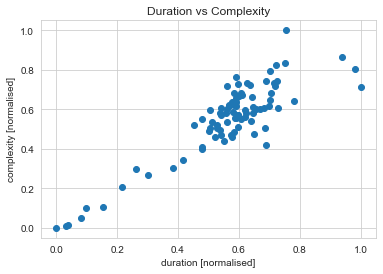

In [456]:
make_scatterplot(data["duration"], data["complexity"], xlabel="duration [normalised]", ylabel="complexity [normalised]", title="Duration vs Complexity")

As evident from the figure above, there is an especially strong positive correlation between the duration and complexity.

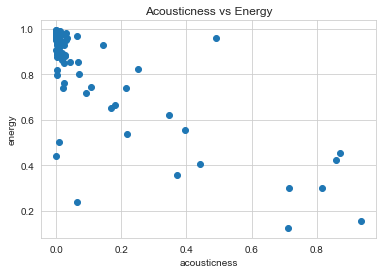

In [457]:
make_scatterplot(data["acousticness"], data["energy"], xlabel="acousticness", ylabel="energy", title="Acousticness vs Energy")

In the figure above, a moderately strong negative correlation of acousticness and energy with a few outliers can be observed.

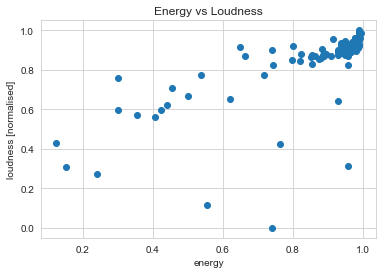

In [458]:
make_scatterplot(data["energy"], data["loudness"], xlabel="energy", ylabel="loudness [normalised]", title="Energy vs Loudness")

There is a moderately strong positive correlation of energy and loudness with a few highly energetic yet less loud outliers evident in the figure above.

As seen in Appendix IX.III, no correlations of the categorical explanatory variable mode with numerical explanatory variables were found.

#### IV.V.IV Examining the relation of explanatory variables and the response variable

It is required that the relationship of explanatory variables and the response variable is linear in nature, which can be examined on scatter plots.

As evidenced by Appendix IX.IV, most explanatory variables have a roughly linear relationship with popularity. There are a few exeptions, however.

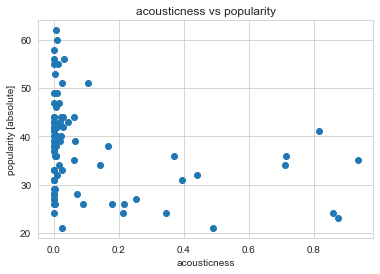

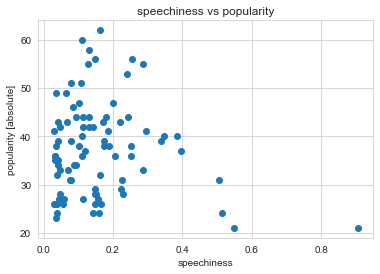

In [459]:
make_scatterplot(data["acousticness"], data["popularity_abs"], xlabel="acousticness", ylabel="popularity [absolute]", title="acousticness vs popularity")
make_scatterplot(data["speechiness"], data["popularity_abs"], xlabel="speechiness", ylabel="popularity [absolute]", title="speechiness vs popularity")

The variables acousticness and speechiness show little evidence of any relationship, but will be used when modelling in case the visual assessment was not correct.

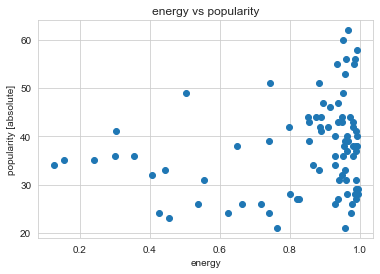

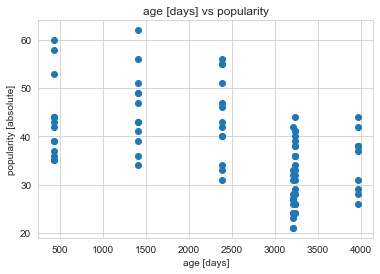

In [460]:
make_scatterplot(data["energy"], data["popularity_abs"], xlabel="energy", ylabel="popularity [absolute]", title="energy vs popularity")
make_scatterplot(data["age_days"], data["popularity_abs"], xlabel="age [days]", ylabel="popularity [absolute]", title="age [days] vs popularity")

The variables energy and age seems to have a non-linear relationship with popularity, but will be used in modelling because in is possible that this relationship can be modelled reasonably well with a polynomial function.

## V. Results

### V.I. Cleaning the data set

As explained in the section above, the variables key, time_signature, explicit and instrumentalness were discarded because there are not enough data to prove they have any effect on the response variable.

### V.II Obtaining the Models

\[todo: describe how the models were obtained\]

As evidenced by Appendix IX.VII, the best models obtained via forward selection are:

- the best model for absolute popularity excluding correlations: `popularity_abs ~ age_days + complexity + track_number`.
- the best model for relative popularity excluding correlations: `popularity_norm ~ age_days + complexity + track_number`.
- the best model for absolute popularity including correlations: `popularity_abs ~ age_days + complexity + track_number + track_number*duration + danceability + duration`.
- the best model for relative popularity including correlations: `popularity_norm ~ age_days + complexity + track_number + track_number*duration + danceability + duration`.

As evidenced by Appendix IX.VIII, the best models obtained via backward selection are:

- the best model for absolute popularity excluding correlations: `popularity_abs ~ track_number + duration + danceability + age_days`.
- the best model for normalised popularity excluding correlations: `popularity_norm ~ track_number + duration + danceability + age_days`.
- the best model for absolute popularity including correlations: `popularity_abs ~ track_number + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity`.
- the best model for relative popularity including correlations: `popularity_norm ~ track_number + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity`.

### V.III Inspecting the models

As evidenced in appendix IX.IX:

- `popularity_abs ~ age_days + complexity + track_number` has the adjusted $R^2$ of 0.546, meaning the model explains almost 55% of the variance in the data. Given the complexity of the dataset and the last year's results, this value is higher than expected. Apparently, the addition of song's age into the dataset was a good decision. All three explanatory variables used had a highly statistically significant p-value of less than 0.001. The coefficients can be interpreted as follows: the expected popularity of any In This Moment song is 40, slighly dropping the higher the track number is and the older the song is and strongly rising with additional complexity. The best song according to this model is a new, complex song which appears the first in the album.
- `popularity_norm ~ age_days + complexity + track_number` has the same adjusted $R^2$ as the model above, which is not surprising given it uses the same variables. The p-values are also the same. The coefficients values are slightly different but their proportions are roughly the same, meaning that the interpretatoins of the coefficients and the best song according to this model is the same as above.
- `popularity_abs ~ age_days + complexity + track_number + track_number*duration + danceability + duration` has the adjusted $R^2$ of 0.583, meaning almost 60% of the variance in the data is explained by this model. Since this model takes into account the interaction of track number and duration, it is not surprising it explains more variance than the previous two models. The coefficients can be interpreted as follows: the expected popularity of any In This Moment song is 30, slighly dropping the older the song is and strongly rising with complexity and danceability. Furthermore, songs that are up to 13th on the album (bound included), rise in popularity with increasing duration up to a certain point (somewhere between 0.1 and 0.15 values of duration). Songs that are 14th and above however decrease in popularity with increasing duration. Therefore, the best song according to this model is a new, complex song with high danceability that appears towards the end of an album and is relatively long. It is interesting to note that not all p-values are statistically significant - namely complexity and track_number have very high p-values, meaning their inclusion might have happen due to chance rather than a real trend in data. This hypothesis could be verified once more data are available. Danceability and the track number interaction with duration have a statistically significant p-value while the age has a very highly significant value of less than 0.001.
- `popularity_norm ~ age_days + complexity + track_number + track_number*duration + danceability + duration` has the same adjusted $R^2$ as the model above, which is not surprising given it uses the same variables. The coefficients values are slightly different but their proportions are roughly the same, meaning that the interpretatoins of the coefficients and the best song according to this model is the same as above.
- `popularity_abs ~ track_number + duration + danceability + age_days` has the adjusted $R^2$ of 0.560, meaning it explains 56% of the variability in the data. All variables included in the model have a highly statistically significant value of less than or equal to 0.001. The best song according to this model is a new song at the beginning of the album which is relatively long and has a high danceability value.
- For the model `popularity_norm ~ track_number + duration + danceability + age_days`, it again holds that all its characteristics are the same or highly similar as the model above.
- `track_number + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity` has the adjusted $R^2$ of 0.620, meaning it explains 62% of variance in the data. In terms of $R^2$, this is the best model (along with the model below). All variables except for danceability, valence and complexity have statistically significant values. The best song according to this model is a new song at the beginning of the album which has a relatively high value of speechiness. The preference for speechiness might seem odd, however one possible explanation is that songs which contain spoken or whispered words tend to be more emotional and therefore there is a higher chance the listeners will find them relatable. This of course may not be true of all artists but from the author's subjective view, it holds for In This Moment. Furthermore, based on the interaction terms, this best song should either have low complexity, short duration, low valence and low danceability or high complexity, long duration, high valence and high danceability. These two possibilities are polar opposites, but there is no reason to suspect that it is wrong; there might be more than one type of a song that the listeners of In This Moment enjoy. 
- For the model `popularity_norm ~ track_number + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity`, it again holds that all its characteristics are the same or highly similar as the model above.


As evidenced by the Appendix IX.X, the models have following MAPEs:
- `popularity_abs ~ age_days + complexity + track_number`: 0.1503
- `popularity_norm ~ age_days + complexity + track_number`: 0.4918
- `popularity_abs ~ age_days + complexity + track_number + track_number*duration + danceability + duration`: 0.1540
- `popularity_norm ~ age_days + complexity + track_number + track_number*duration + danceability + duration`: 0.4605
- `popularity_abs ~ track_number + duration + danceability + age_days`: 0.1475
- `popularity_norm ~ track_number + duration + danceability + age_days`: 0.5615
- `popularity_abs ~ track_number + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity`: 0.1452
- `popularity_norm ~ track_number + speechiness + age_days + duration*complexity + danceability*valence + danceability*complexity`: 0.4652

For every pair of models, it holds that the MAPE rate of a model with normalised popularity is approximatelly three times higher than the MAPE of models predicting the absolute popularity.

### V.V Checking the inference conditions

\[todo\]

### V.VI Performing the inference

\[todo\]

## VI. Limitations

- The outcomes of this project are **directly applicable only to this specific case**. The concrete methods for obtaining the data set, analysing it and performing the multi-linear regression can however be used for the same application on works of different artists.

- There is relatively a lot of **unexplained variance** left (almost 40% in the best case scenario), meaning that other forms of regression may be more suitable for this data set.

## VII. Conclusions

\[todo\]

## VIII. Changes

- Two new branches in the projects Github repository were added: ([ITM-song-popularity](https://github.com/ChrisScarred/ITM-song-popularity/tree/master)):
    - [Branch 2020](https://github.com/ChrisScarred/ITM-song-popularity/tree/2020) to make comparisons with current year's changes easy.
    - [Branch 2021](https://github.com/ChrisScarred/ITM-song-popularity/tree/2021) as the development branch.
    - The main branch currently contains the finished project from the last year and is going to be replaced by the finished project of this year after the development is done.
- Added documentation on how to use the `data_getter` sub-module.
- Refactored the entire code architecture to be more readable.
- Added a changelog.
- Refactored the `data_getter` sub-module to be clearer, easier to understand, easier to read and to not contain any hard-coded references to artists and their albums.
- Rewrote this report entirely.
- Dropped the model generation techniques that were not a part of this course.
- Put the Appendices into a separate folder on Github ().